<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [ ]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [ ]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

# Read the data
df = pd.read_csv(boston_url)



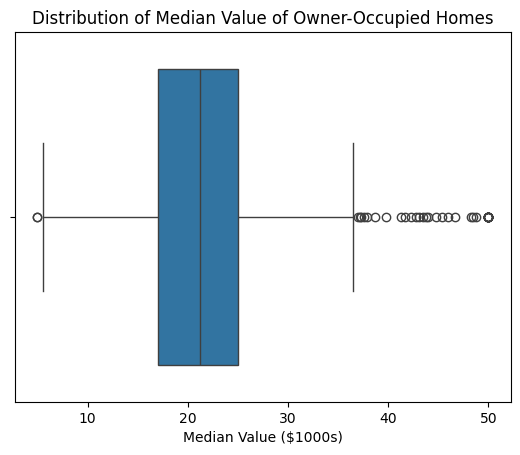

In [27]:
# Boxplot for Median value of owner-occupied homes
sns.boxplot(x = df["MEDV"])
plt.title("Distribution of Median Value of Owner-Occupied Homes")
plt.xlabel("Median Value ($1000s)")
plt.ylabel("")
plt.show()

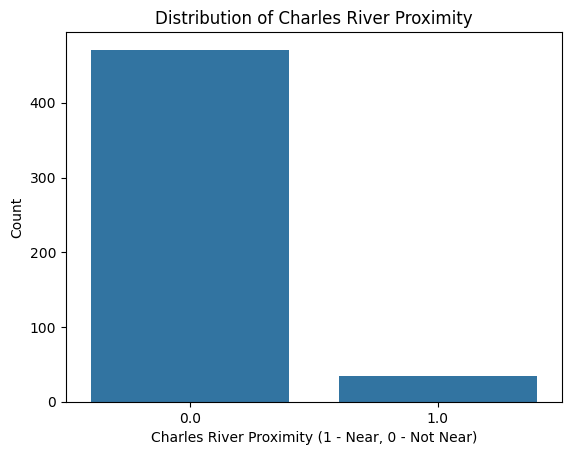

In [28]:
#  Bar plot for Charles River" variable
sns.countplot(x = df["CHAS"])
plt.title("Distribution of Charles River Proximity")
plt.xlabel("Charles River Proximity (1 - Near, 0 - Not Near)")
plt.ylabel("Count")
plt.show()

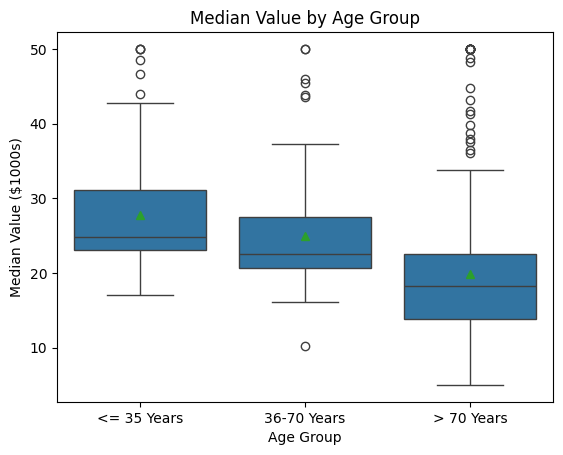

In [29]:
# Boxplot for MEDV vs discretized AGE
df["Age_Group"] = pd.cut(df["AGE"], bins=[0, 35, 70, 100], labels=["<= 35 Years", "36-70 Years", "> 70 Years"])
sns.boxplot(
    x = "Age_Group",
    y = "MEDV",
    showmeans=True,
    data=df
)
plt.title("Median Value by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Value ($1000s)")
plt.show()


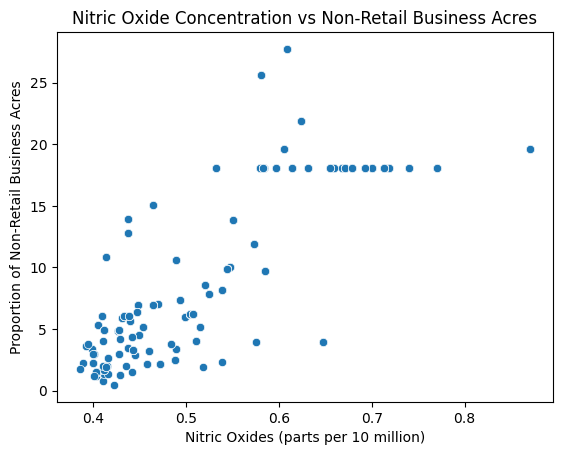

In [30]:
# Scatter plot for Nitric Oxide vs Non-Retail Business Acres
sns.scatterplot(x = df["NOX"], y = df["INDUS"])
plt.title("Nitric Oxide Concentration vs Non-Retail Business Acres")
plt.xlabel("Nitric Oxides (parts per 10 million)")
plt.ylabel("Proportion of Non-Retail Business Acres")
plt.show()

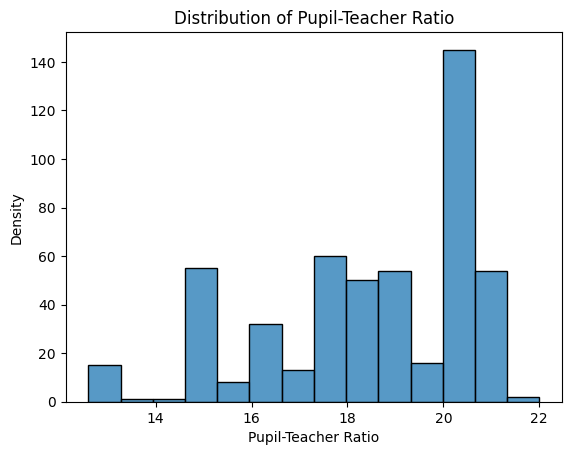

In [31]:
#  Histogram for Pupil-Teacher Ratio
sns.histplot(x = df["PTRATIO"])
plt.title("Distribution of Pupil-Teacher Ratio")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Density")
plt.show()

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#Hypothesis: Null hypothesis (H0): There is no significant difference in median value of houses bounded by the Charles river and those not bounded by it. 
#Alternative hypothesis (H1): There is a significant difference in median value of houses bounded by the Charles river and those not bounded by it.

In [19]:
# T-test
t_stat, p_value = stats.ttest_ind(df[df['CHAS'] == 1]['MEDV'], df[df['CHAS'] == 0]['MEDV'])

print("T-statistic:", t_stat)
print("p-value:", p_value)


T-statistic: 3.996437466090509
p-value: 7.390623170519905e-05


In [ ]:
#p-value >= 0.05, fail to reject H0: There is no significant difference in median value of houses bounded by the Charles river and those not bounded by it.

In [20]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#Hypothesis:
#Null hypothesis (H0): There is no difference in median values of houses for different age groups.
#Alternative hypothesis (H1): There is a difference in median values of houses for at least one age group.

In [33]:

df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['Young', 'Middle', 'Old'])


model = ols('MEDV ~ AGE_GROUP', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                 sum_sq     df         F        PR(>F)
AGE_GROUP   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN


In [ ]:
#p-value for AGE_GROUP >= 0.05, fail to reject H0: There is no difference in median values of houses for different age groups.

In [ ]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#Hypothesis:
#Null hypothesis (H0): There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.
#Alternative hypothesis (H1): There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [22]:
# Pearson correlation
corr, p_value = stats.pearsonr(df['NOX'], df['INDUS'])
print("Correlation coefficient:", corr)
print("p-value:", p_value)


Correlation coefficient: 0.7636514469209192
p-value: 7.913361061210442e-98


In [ ]:
#p-value >= 0.05, fail to reject H0: There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [ ]:
#4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [23]:
# Regression model
model = ols('MEDV ~ DIS', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        19:25:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

In [ ]:
# there is a statistically significant positive relationship between the weighted distance to employment centers and the median value of owner-occupied homes